In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
df= pd.read_csv("/content/Train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Unnamed..0,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,...,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,SimillarHTTP,Inbound,Label
0,1110,172.16.0.5-192.168.50.1-872-45984-17,172.16.0.5,872,192.168.50.1,45984,17,29:44.0,2,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,1.470000e+09,1.000000e+06,2.0,0.0,2.0,2,2,2.0,0.0,2,2,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
1,25998,172.16.0.5-192.168.50.1-867-39632-17,172.16.0.5,867,192.168.50.1,39632,17,31:01.1,43,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,6.846512e+07,4.651163e+04,43.0,0.0,43.0,43,43,43.0,0.0,43,43,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
2,10751,172.16.0.5-192.168.50.1-818-826-17,172.16.0.5,818,192.168.50.1,826,17,24:38.4,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.940000e+09,2.000000e+06,1.0,0.0,1.0,1,1,1.0,0.0,1,1,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,40.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
3,15983,172.16.0.5-192.168.50.1-894-32984-17,172.16.0.5,894,192.168.50.1,32984,17,27:01.5,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.940000e+09,2.000000e+06,1.0,0.0,1.0,1,1,1.0,0.0,1,1,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,-2.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
4,29733,172.16.0.5-192.168.50.1-877-12571-17,172.16.0.5,877,192.168.50.1,12571,17,26:58.1,3,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,9.813333e+08,6.666667e+05,3.0,0.0,3.0,3,3,3.0,0.0,3,3,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP


In [ ]:
df.Label.unique()

array(['DrDoS_LDAP', 'DrDoS_DNS', 'DrDoS_MSSQL', 'DrDoS_UDP',
       'DrDoS_NetBIOS', 'Syn', 'UDP-lag', 'DrDoS_SSDP', 'DrDoS_SNMP',
       'DrDoS_NTP', 'TFTP', 'BENIGN'], dtype=object)

In [ ]:
df1 = df.replace(to_replace ="DrDoS_LDAP", 
                 value =1.0) 
df2 = df1.replace(to_replace ="DrDoS_DNS", 
                 value =2.0)
df3 = df2.replace(to_replace ="DrDoS_MSSQL", 
                 value =3.0)
df4 = df3.replace(to_replace ="DrDoS_UDP", 
                 value =4.0)
df5 = df4.replace(to_replace ="DrDoS_NetBIOS", 
                 value =5.0)
df6 = df5.replace(to_replace ="Syn", 
                 value =6.0)
df7 = df6.replace(to_replace ="UDP-lag", 
                 value =7.0)
df8 = df7.replace(to_replace ="DrDoS_SSDP", 
                 value =8.0)
df9 = df8.replace(to_replace ="DrDoS_SNMP", 
                 value =9.0)
df10 = df9.replace(to_replace ="DrDoS_NTP", 
                 value =10.0)
df11 = df10.replace(to_replace ="TFTP", 
                 value =11.0)
df12 = df11.replace(to_replace ="BENIGN", 
                 value =0.0)

In [ ]:
df12.Label.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  0.])

In [ ]:
df12["Flow.ID"] = df12["Flow.ID"].str.replace(r'\D', '')
df12["Source.IP"] = df12["Source.IP"].str.replace(r'\D', '')
df12["Destination.IP"] = df12["Destination.IP"].str.replace(r'\D', '')
df12["Timestamp"] = df12["Timestamp"].str.replace(r'\D', '')
df13 = df12.drop(columns=['SimillarHTTP'])
df14 =  df13.replace([np.inf, -np.inf], np.nan)
df15 = df14.fillna(0)

In [ ]:
df15.dtypes

Unnamed..0          int64
Flow.ID            object
Source.IP          object
Source.Port         int64
Destination.IP     object
                   ...   
Idle.Std          float64
Idle.Max          float64
Idle.Min          float64
Inbound             int64
Label             float64
Length: 87, dtype: object

In [ ]:
df15.isnull().values.any()

False

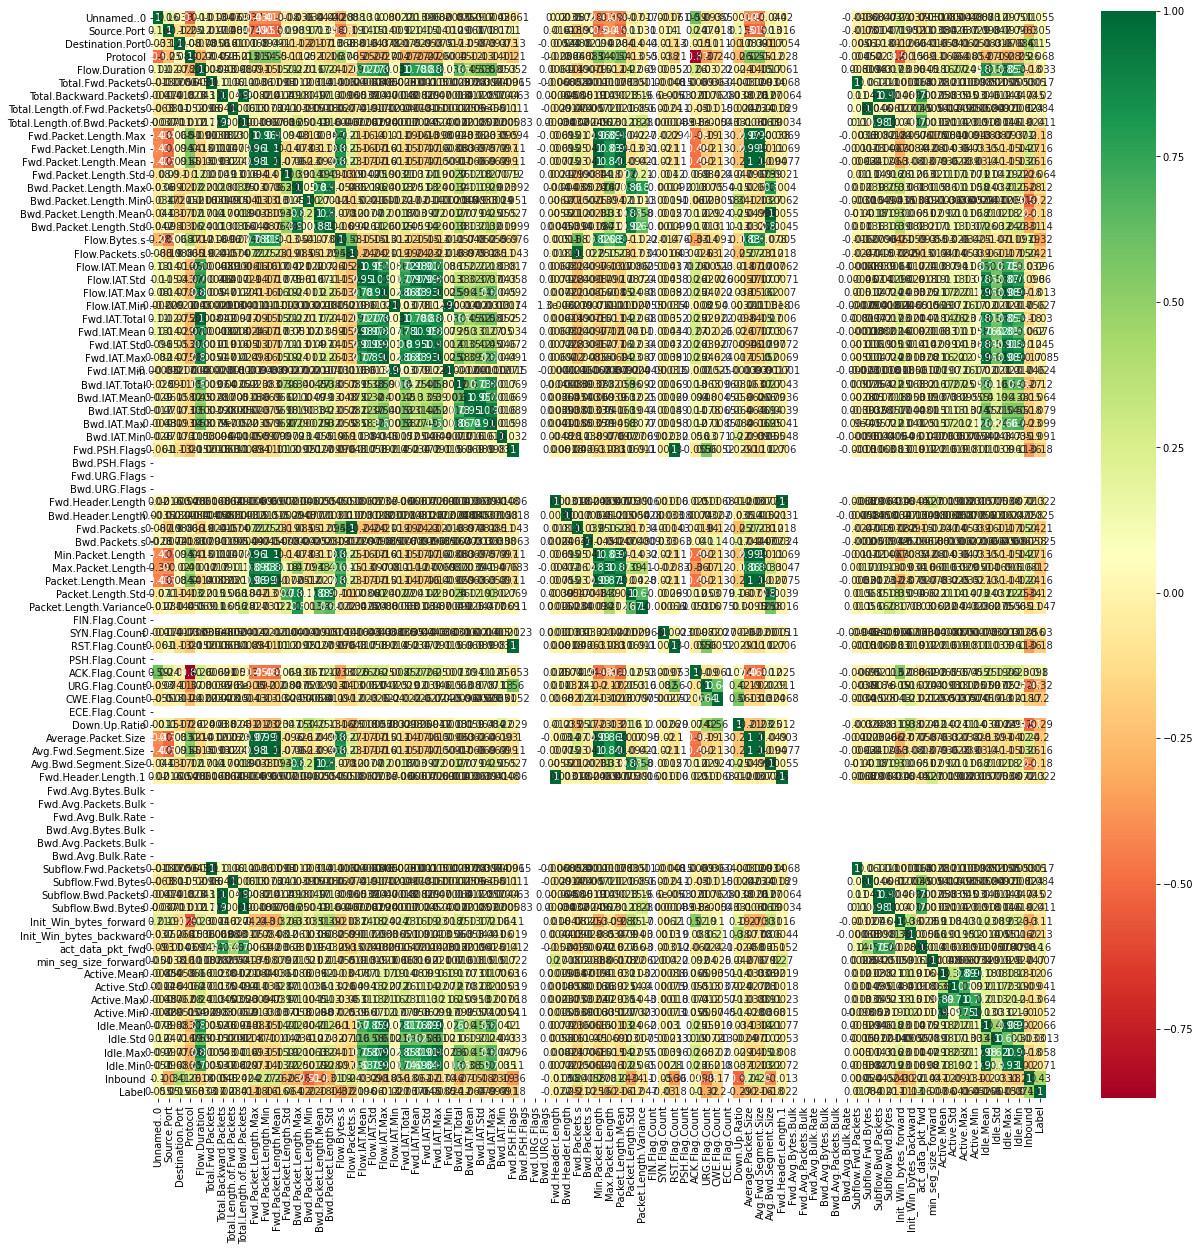

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df15.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df15[top_corr_features].corr(),annot=True,cmap="RdYlGn")